<a href="https://colab.research.google.com/github/dzikri200/snsscrape_twitter/blob/main/snsscrape_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


snscrape adalah scraper untuk layanan jejaring sosial (SNS). Itu mengikis hal-hal seperti profil pengguna, tagar, atau pencarian dan mengembalikan item yang ditemukan, mis. pos-pos yang relevan. Layanan berikut saat ini didukung: Facebook: profil pengguna, grup, dan komunitas (alias pos pengunjung)

In [ ]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ef16db63068f8a15a958d5e9d0fe9aa2aeae7f72823017e29b4e4abbbc789e43
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


langdetect adalah implementasi ulang pustaka deteksi bahasa Google dari Java ke Python.

In [ ]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

PROSES INI BERMANFAAT UNTUK MENGIMPOR MODUL SNSCRAPE UNTUK MENANGANI DATA YANG KITA DAPATKAN DARI TWITTER

In [ ]:
keywords=['Sepak bola indonesia']
start="2022–10–01"
end ="2022–10–31"
max_num=10
fname='tweet.json' 
languages=['id']

Memilih kata kunci di Twitter

In [ ]:
import pandas as pd
datatw=[]

Membuat Variabel "datatw" untuk, menampilkan hasil data yang  diambil di Twitter

In [ ]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

Kemudian mulai crawling

In [ ]:
datatw

['#Kylian Mbappe#Hengkang#PSG!\n\nPemain sepak bola Prancis, Kylian Mbappe bersikeras tidak pernah meminta hengkang dari klub Paris Saint-Germain (PSG).\n\nhttps://t.co/Ju8qczhE0T',
 '@CNNIndonesia Reorganisasi PSSI dulu dgn yg benar benar profesional di bidangnya baru Sepak bola Indonesia maju 👌',
 'Kita masih belum tau apakah ending dari bisnis sepak bola artis ini akan berakhir seperti kue artis yg pernah hits beberpa tahun yg lalu. \n\nTapi setidaknya ada angin segar utk memajukan sepak bola Indonesia dengan mengubah pakem tentang cara mengelola bisnis di industri sepakbola',
 '@sulaimaneffendi Usut tuntas itu utk membersihkan polisi dari oknum polisi.\nUsut tuntas itu utk membersihkan aremania dari oknum aremania.\n\nAyo sam jaga kehormatan nama baik supporter sepak bola indonesia dg taat hukum.',
 'Wes berkali2 pssi koyok ngene, ben ganti ketua pancet lek nyekel jabatan koyok wong sing wedhi kehilangan harta. Tapi wong2 sek terlena ambek dodolane psshit perkoro terlalu mencintai 

Menampilkan datatw yang tersimpan di csv

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.4 MB/s 


Kemudian install sastrawi<br>
Python Sastrawi adalah pengembangan dari proyek PHP Sastrawi. Python Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya. Sastrawi juga dapat diinstal melalui “pip”.

In [ ]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

Proses Stemming
Proses stemming adalah proses mengubah kata berimbuhan menjadi kata dasar. Misalnya kata memakan menjadi makan,

In [ ]:
documents_clean[0:5]

['kylian mbappe hengkang psg main sepak bola prancis kylian mbappe sikeras pernah minta hengkang klub paris saint germain psg https t co juqczhet',
 'cnnindonesia reorganisasi pssi dulu dgn yg benar benar profesional bidang baru sepak bola indonesia maju',
 'masih tau ending bisnis sepak bola artis akan akhir kue artis yg pernah hits beberpa tahun yg lalu tidak angin segar utk maju sepak bola indonesia ubah pakem cara kelola bisnis industri sepakbola',
 'sulaimaneffendi usut tuntas utk bersih polisi oknum polisi usut tuntas utk bersih aremania oknum aremania ayo sam jaga hormat nama baik supporter sepak bola indonesia dg taat hukum',
 'wes berkali pssi koyok ngene ben ganti ketua pancet lek nyekel jabat koyok wong sing wedhi hilang harta wong sek lena ambek dodolane psshit perkoro terlalu cinta sepak bola indonesia sek pancet mbok tontok ta ngono iku ngko https t co ciprbdl']

documents_clean untuk menghapus semua karakter tidak dapat dicetak dari teks

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


tf-idf digunakan untuk mengklasifikasikan dokumen, peringkat di mesin pencari. tf: term frequency (jumlah kata yang ada dalam dokumen dari kosakatanya sendiri), idf: frekuensi dokumen terbalik (pentingnya kata untuk setiap dokumen).

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

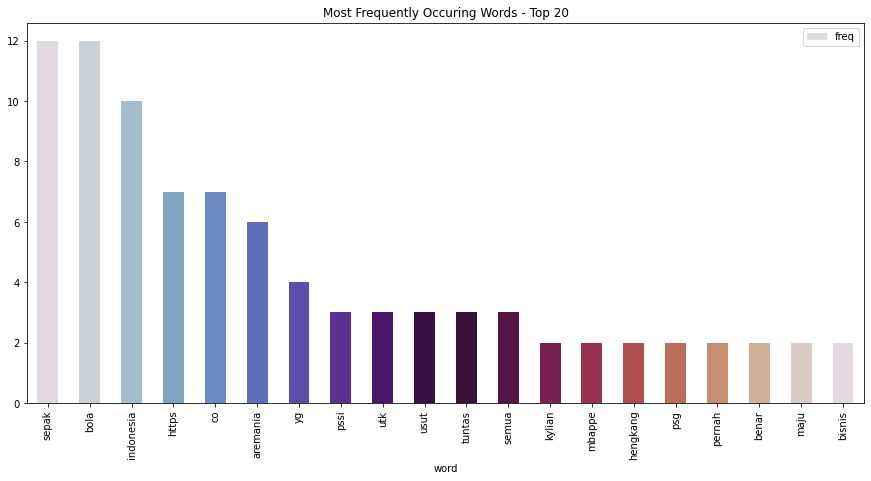

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

list daftar kata-kata yang paling umum dari corpus teks menggunakan Scikit-Learn

In [ ]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

Clustering Algoritma (K-Means) memiliki tujuan untuk meminimalisasikan fungsi objective yang telah di set dalam proses clustering. Tujuan tersebut dilakukan dengan cara meminimalikan variasi data yang ada didalam cluster dan memaksimalikan variasi data yang ada di cluster lainnya.

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 sepak
 bola
 indonesia
 https
 co
 yg
 pssi
 kylian
 benar
 psg
Cluster 1:
 aremania
 semua
 masuk
 tinggal
 dalang
 martir
 bola
 luka
 teman
 indonesia
Cluster 2:
 polisi
 utk
 bersih
 tuntas
 usut
 aremania
 oknum
 nama
 sulaimaneffendi
 indonesia




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


LAKUKAN ORDER CENTROID, UNTUK mendistribusikan HASIL UNTUK SETIAP CLUSTER

In [ ]:
print("Prediction")
Y = cv.transform(["sepak bola"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["aremania"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [0]
Cluster number : [0]


setelah melakukan cluster kita bisa juga melakukan prediction kata tersebut masuk ke cluster berapa seperti contoh dibawah ini

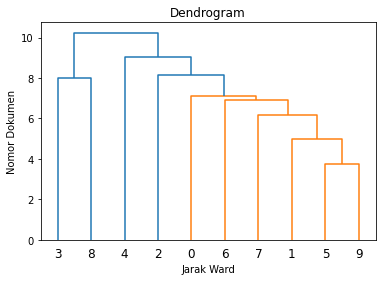

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

lalu kita buat diagram/dendogram menggunakan method "ward" seperti ini

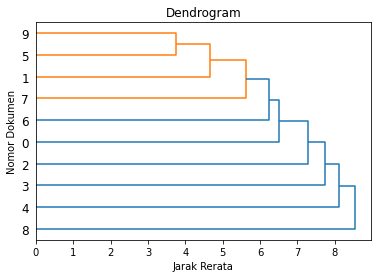

In [ ]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

Fungsi-fungsi ini memotong pengelompokan hierarki menjadi pengelompokan datar atau menemukan akar hutan yang dibentuk oleh potongan dengan memberikan id cluster datar dari setiap pengamatan.

https://www.freecodecamp.org/news/python-web-scraping-tutorial/
https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721